<a href="https://colab.research.google.com/github/burakerdgn/GoogleColab/blob/main/PyTorch_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyTorch**

## **Basics**

In [ ]:
import torch
import numpy as np
torch.__version__

'1.8.1+cu101'

In [ ]:
arr = np.array([1,2,3,4,5])
print(arr)

[1 2 3 4 5]


In [ ]:
arr.dtype

dtype('int64')

In [ ]:
torch.from_numpy(arr)

tensor([1, 2, 3, 4, 5])

In [ ]:
torch.as_tensor(arr)

tensor([1, 2, 3, 4, 5])

In [ ]:
arr2d = np.arange(0.0,12.0)
arr2d

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [ ]:
arr2d = arr2d.reshape(4,3)
arr2d

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.]])

In [ ]:
torch.from_numpy(arr2d)  # this creates a tensor from an array and both share the same memory at computer

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]], dtype=torch.float64)

In [ ]:
# to create a totally different tensor from an array we should copy the array
my_tensor = torch.tensor(arr)
my_tensor

tensor([1, 2, 3, 4, 5])

In [ ]:
# torch.tensor creates a tensor from int values however when we need a tensor made of float values, we should use torch.Tensor


## **Operations**

In [ ]:
x = torch.arange(6).reshape(3,2)

In [ ]:
x

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [ ]:
x[1,1]

tensor(3)

In [ ]:
x[:,1]

tensor([1, 3, 5])

In [ ]:
x = torch.arange(10)

In [ ]:
x

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
x.view(2,5)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
a = torch.tensor([1.,2.,3,])
b = torch.tensor([4.,5.,6.])

In [ ]:
a + b

tensor([5., 7., 9.])

In [ ]:
torch.add(a,b)

tensor([5., 7., 9.])

In [ ]:
a*b

tensor([ 4., 10., 18.])

In [ ]:
a.mul(b)

tensor([ 4., 10., 18.])

In [ ]:
a.dot(b)

tensor(32.)

In [ ]:
a = torch.tensor([[0,2,4],[1,3,5]])
b = torch.tensor([[6,7],[8,9],[10,11]])

In [ ]:
# mm means matrix multiplication
torch.mm(a,b)

tensor([[56, 62],
        [80, 89]])

In [ ]:
a @ b

tensor([[56, 62],
        [80, 89]])

## **Basic Concepts**

**Supervised Learning** = Supervised learning algorithms are trained using labeled examples, such as an input where the desired output is known

*   Training Data = Used to train model parameters
*   Validation Data = Used to determine what model hyperparameters to adjust
*   Test Data = Used to get some performance metric







**Overfitting** = The model fits too much to the noise from the data. This often results in low error on training sets but high error on test/validiation sets

**Underfitting** = Model does not capture the underlying trend of the data and does not fit the data well enough. It leads low variance but high bias. Underfitting is often a result of an excessively simple model

**Classification Error Metrics**

*   Accuracy = Number of correct predictions / total number of predictions
*   Recall = Ability of a model to find all the relevant cases within a dataset
*   F1-Score = The f1 score is the hermonic mean of precision and recall taking both metrics into account in the following equation: 2 * ((precision * recall)/precision + recall))
*   Confusion Matrix = It shows true positive , true negateive , false positive , false negative




**Regression Error Metrics** =  Regression is a task when a model attempts to predict continuous values(unlike categorical values, which is classification)


*   Mean Absolute Error 
*   Mean Squared Error
*   Root Mean Square Error



**Unsupervised Learning** = This technique is used when we do not have labeled 

The tasks that fall under unsupervised learning
*   Clustering
*   Anomaly Detection
*   Dimensionality Reduction



**Clustering** = Grouping together unlabeled data points into categories/clusters.  Data points are assigned to a cluster based on similarity

**Anomaly Detection** = Attempts to detect outliers in a dataset

**Dimensionality Reduction** = Data processing techniques that reduces the number of features in a data set, either for compression or to better understand underlying trends within a data set

## **Artificial Neural Network with MNIST Dataset**

**MNIST** = Handwritten numbers dataset. 60,000 training images and 10,000 test images

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# MNIST IMAGE --> Tensors

transform = transforms.ToTensor()

In [ ]:
train_data = datasets.MNIST(root='Data',train=True, download=True, transform=transform)

In [ ]:
test_data = datasets.MNIST(root='Data',train=False, download=True, transform=transform)

In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [ ]:
train_data[0]

In [ ]:
image,label = train_data[0]

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
label

5

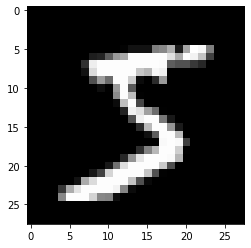

In [ ]:
plt.imshow(image.reshape((28,28)),cmap='gray')

In [ ]:
torch.manual_seed(101)

train_loader = DataLoader(train_data,batch_size=100,shuffle=True)

test_loader = DataLoader(test_data,batch_size=500,shuffle=False)

In [ ]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) # Formatting

In [ ]:
# FIRST BATCH
for images,labels in train_loader:  # 60.000 / 100 = 60 times 
  break

In [ ]:
images.shape

torch.Size([100, 1, 28, 28])

In [ ]:
# Print the first 12 labels
print('Labels:',labels[:12].numpy())

Labels: [   7    2    3    5    8    5    3    6    9    9    1    3]


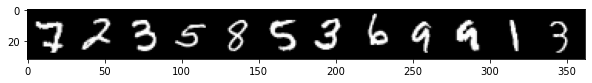

In [ ]:
#Print the first 12 images
im = make_grid(images[:12],nrow=12) 
plt.figure(figsize=(10,4))
#transposing the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(),(1,2,0)));

In [ ]:
class MultilayerPerceptron(nn.Module):

  def __init__(self,in_sz=784,out_sz=10,layers=[120,84]):  # in_sz = 28 x 28 (pixels), out_sz = 10 number of class

      super().__init__()

      self.fc1 = nn.Linear(in_sz,layers[0])
      self.fc2 = nn.Linear(layers[0],layers[1])
      self.fc3 = nn.Linear(layers[1],out_sz)

  def forward(self,X):

    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X,dim=1) # Multiclass clasification

In [ ]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
# ANN -----> CNN
for param in model.parameters():
  print(param.numel())

94080
120
10080
84
840
10


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [ ]:
import time
start_time = time.time()

# Training

epochs = 10


# TRACKERS
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):

  trn_corr = 0
  tst_corr = 0

  for b, (X_train,y_train) in enumerate(train_loader):

    b+=1
    
    y_pred = model(X_train.view(100,-1))
    loss = criterion(y_pred,y_train)

    predicted =torch.max(y_pred.data,1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b%200 == 0:
      accuracy = trn_corr.item()*100/(100*b)
      print(f'Epoch {i} batch:{b} loss:{loss.item} accuracy:{accuracy}')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  with torch.no_grad():

    for b,(X_test,y_test) in enumerate(test_loader):

      y_val = model(X_test.view(500,-1))

      predicted = torch.max(y_val.data,1)[1]
      tst_corr += (predicted==y_test).sum()
  
  loss = criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


total_time = time.time() - start_time
print(f'Duration: {total_time/60}mins')

Epoch 0 batch:200 loss:<built-in method item of Tensor object at 0x7f49305156e0> accuracy:96.71
Epoch 0 batch:400 loss:<built-in method item of Tensor object at 0x7f4930580320> accuracy:96.685
Epoch 0 batch:600 loss:<built-in method item of Tensor object at 0x7f4930518280> accuracy:96.77333333333333
Epoch 1 batch:200 loss:<built-in method item of Tensor object at 0x7f49307acf50> accuracy:97.505
Epoch 1 batch:400 loss:<built-in method item of Tensor object at 0x7f4930517dc0> accuracy:97.5525
Epoch 1 batch:600 loss:<built-in method item of Tensor object at 0x7f4930517dc0> accuracy:97.52666666666667
Epoch 2 batch:200 loss:<built-in method item of Tensor object at 0x7f49307bfb90> accuracy:98.145
Epoch 2 batch:400 loss:<built-in method item of Tensor object at 0x7f493074ea00> accuracy:98.0575
Epoch 2 batch:600 loss:<built-in method item of Tensor object at 0x7f4930529730> accuracy:98.06666666666666
Epoch 3 batch:200 loss:<built-in method item of Tensor object at 0x7f4930517280> accuracy:98.

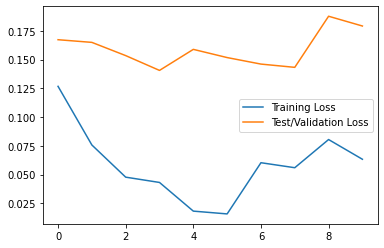

In [ ]:
plt.plot(train_losses,label='Training Loss')
plt.plot(test_losses,label='Test/Validation Loss')
plt.legend()

In [ ]:
train_acc = [t/600 for t in train_correct]

In [ ]:
test_acc = [t/100 for t in test_correct]

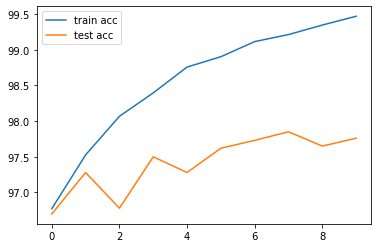

In [ ]:
plt.plot(train_acc,label='train acc')
plt.plot(test_acc,label='test acc')
plt.legend()


In [ ]:
test_load_all = DataLoader(test_data,batch_size=10000,shuffle=False)

In [ ]:
with torch.no_grad():
  correct = 0

  for X_test,y_test in test_load_all:
    y_val = model(X_test.view(len(X_test),-1))
    predicted = torch.max(y_val,1)[1]
    correct += (predicted==y_test).sum()

In [ ]:
correct

tensor(9776)

In [ ]:
confusion_matrix(predicted.view(-1),y_test.view(-1))

array([[ 968,    0,    5,    0,    1,    2,    2,    0,    2,    1],
       [   1, 1129,    3,    0,    0,    0,    3,    6,    1,    4],
       [   0,    2, 1006,    2,    4,    0,    3,    9,    1,    0],
       [   1,    1,    4,  977,    0,    5,    1,    2,    8,    4],
       [   1,    0,    1,    0,  968,    2,    3,    1,    4,   14],
       [   0,    1,    0,   19,    0,  878,   10,    1,    9,    7],
       [   3,    1,    1,    0,    3,    0,  936,    0,    1,    0],
       [   2,    1,    3,    4,    1,    0,    0, 1002,    2,    6],
       [   3,    0,    9,    3,    1,    4,    0,    3,  944,    5],
       [   1,    0,    0,    5,    4,    1,    0,    4,    2,  968]])

## **Convolutional Nueral Network**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
transform = transforms.ToTensor()


In [ ]:
train_data = datasets.MNIST(root='Data',train=True, download=True, transform=transform)

In [ ]:
test_data = datasets.MNIST(root='Data',train=False, download=True, transform=transform)

In [ ]:
train_loader = DataLoader(train_data,batch_size=10,shuffle=True)
test_loader = DataLoader(test_data,batch_size=10,shuffle=False)

In [ ]:
# 1 = input image channel(we have gray scale image = 1 channel) , 6 = feature maps(filters) , 3 = kernel size , 1 = stride num
conv1 = nn.Conv2d(1,6,3,1)  

# First layers filter number is the input number of second layer,
conv2 = nn.Conv2d(6,16,3,1)

In [ ]:
for i, (X_train,y_train) in enumerate(train_data):
  break

In [ ]:
X_train.shape # ----> transform X_train to 4D batch

torch.Size([1, 28, 28])

In [ ]:
x = X_train.view(1,1,28,28)

In [ ]:
x = F.relu(conv1(x))

In [ ]:
x.shape # our image is 28x28 but after 1st conv layer we have 26x26 image tensor. The reason for this is we used pedding = 0

torch.Size([1, 6, 26, 26])

In [ ]:
x = F.max_pool2d(x,2,2)

In [ ]:
x.shape

torch.Size([1, 6, 13, 13])

In [ ]:
x = F.relu(conv2(x)) # pass the last image to 2.layer

In [ ]:
x.shape

torch.Size([1, 16, 11, 11])

In [ ]:
x = F.max_pool2d(x,2,2)

In [ ]:
x.shape


torch.Size([1, 16, 5, 5])

In [ ]:
x = x.view(-1, 5*5*16)
print(x.shape)

torch.Size([1, 400])


In [ ]:
# Create CNN class

class ConvolutionalNetwork(nn.Module):

  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self,X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2)
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2)
    #Flatten the data
    X = X.view(-1,5*5*16)
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X,dim=1)

In [ ]:
torch.manual_seed(42)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
for param in model.parameters():
  print(param.numel())

54
6
864
16
48000
120
10080
84
840
10


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [ ]:
import time
start_time = time.time()

# Variables(trackers)
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# For loop epochs
for i in range(epochs):

  trn_corr = 0
  tst_corr = 0

  # Train
  for b,(X_train,y_train) in enumerate(train_loader):
     b += 1
     
     y_pred = model(X_train)  # Not flatten
     loss = criterion(y_pred,y_train)

     predicted = torch.max(y_pred.data,1)[1]
     batch_corr = (predicted == y_train).sum()
     trn_corr += batch_corr

     optimizer.zero_grad()
     loss.backward()
     optimizer.step()

     if b%600 ==0:
       print(f"Epoch: {i} batch: {b} loss:{loss.item()}")

  train_losses.append(loss)
  train_correct.append(trn_corr)

  # Test
  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_loader):

      y_val = model(X_test)

      predicted = torch.max(y_val.data,1)[1]
      tst_corr = (predicted == y_test).sum()

  loss = criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)



current_time = time.time()
total = current_time - start_time
print(f"Training took {total/60} minutes")

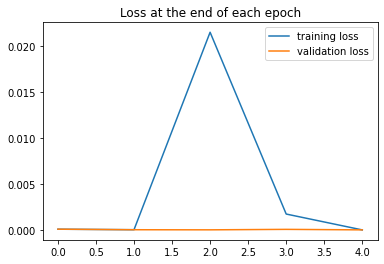

In [ ]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

In [ ]:
test_losses

[tensor(7.9715e-05),
 tensor(2.0359e-05),
 tensor(9.6676e-06),
 tensor(6.0369e-05),
 tensor(5.6147e-06)]

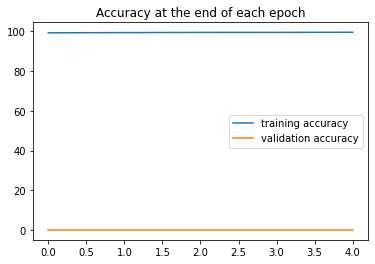

In [ ]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [ ]:
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [ ]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9854/10000 =  98.540%


In [ ]:
# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 961    0    1    0    0    0    1    0    2    0]
 [   2 1133    5    1    1    0    3   12    1    5]
 [   0    0 1016    1    1    0    0    5    2    0]
 [   0    1    0 1006    0    9    0    0    3    4]
 [   0    0    1    0  977    0    1    2    1   20]
 [   0    1    0    1    0  878    4    0    1    6]
 [   8    0    0    0    3    2  948    0    0    0]
 [   2    0    9    1    0    1    0 1006    1    3]
 [   2    0    0    0    0    1    1    1  960    2]
 [   5    0    0    0    0    1    0    2    3  969]]


## **CIFAR-10 CNN**

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
transform = transforms.ToTensor()

In [4]:
train_data = datasets.CIFAR10(root='Data',train=True,download=True,transform=transform)


Extracting Data/cifar-10-python.tar.gz to Data


In [5]:
test_data = datasets.CIFAR10(root='Data',train=False,download=True,transform=transform)

Files already downloaded and verified


In [6]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [14]:
torch.manual_seed(101)
train_loader = DataLoader(train_data,batch_size=10,shuffle=True)
test_loader = DataLoader(test_data,batch_size=10,shuffle=True)

In [20]:
train_loader

In [15]:
class_names = ['plane', '  car', ' bird', '  cat', ' deer', '  dog', ' frog', 'horse', ' ship', 'truck']

### **View images**

In [16]:
for images,labels in train_loader:
  break

In [17]:
labels

tensor([1, 5, 8, 1, 6, 1, 6, 3, 7, 9])

Label: [1 5 8 1 6 1 6 3 7 9]
Class:   car   dog  ship   car  frog   car  frog   cat horse truck


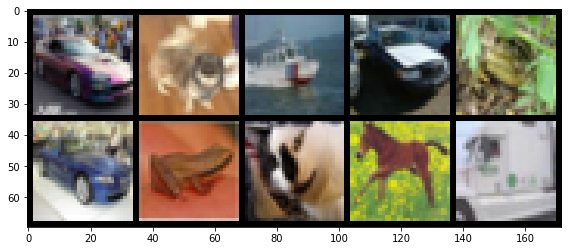

In [19]:
#Print the labels

print('Label:', labels.numpy())
print('Class:', *np.array([class_names[i] for i in labels]))

im = make_grid(images,nrow=5)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [21]:
images[0].shape

torch.Size([3, 32, 32])

In [23]:
(((32-2)/2)-2)/2   # how to find the number at full connected layer (6*6*16)

# 32*32 images  , -2 is loosing pixel due to kernel without padding , /2 is due to pooling layer and it gives us 6 pixel
# 6 is for the filter at first convolutional layer and 16 is for the filter at second conv layer

6.5

In [38]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
      super().__init__()
      self.conv1 = nn.Conv2d(3,6,5,1) #(1,6,5,1)
      self.conv2 = nn.Conv2d(6,16,3,1)
      self.fc1 = nn.Linear(6*6*16,120)
      self.fc2 = nn.Linear(120,84)
      self.fc3 = nn.Linear(84,10)

    def forward(self,X):
      X = F.relu(self.conv1(X))
      X = F.max_pool2d(X,2,2)
      X = F.relu(self.conv2(X))
      X = F.max_pool2d(X,2,2)
      X = X.view(-1,6*6*16)
      X = F.relu(self.fc1(X))
      X = F.relu(self.fc2(X))
      X = self.fc3(X)
      return F.log_softmax(X,dim=1)




In [39]:
torch.manual_seed(101)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [40]:
for param in model.parameters():
    print(param.numel())


450
6
864
16
69120
120
10080
84
840
10


In [ ]:
# sum of all parameters = 81302

In [41]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)


### **Train the Model**

In [ ]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%1000 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/50000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed  

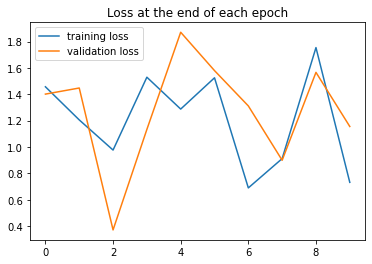

In [43]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

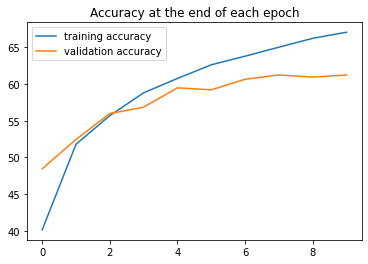

In [44]:
plt.plot([t/500 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

### **Evaluation Test Data**

In [45]:
print(test_correct) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(4846), tensor(5245), tensor(5599), tensor(5686), tensor(5949), tensor(5922), tensor(6066), tensor(6125), tensor(6095), tensor(6124)]

Test accuracy: 61.240%


### **Confusion Matrix**


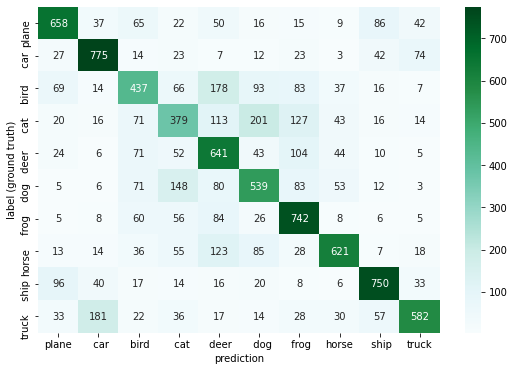

In [46]:
# Create a loader for the entire the test set
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

arr = confusion_matrix(y_test.view(-1), predicted.view(-1))
df_cm = pd.DataFrame(arr, class_names, class_names)
plt.figure(figsize = (9,6))
sn.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")
plt.show();

### **Examine the misses**

In [47]:
misses = np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses,i).astype('int64')
        
# Display the number of misses
len(misses)

3876

In [48]:
# Display the first 8 index positions
misses[:8]

array([ 0,  2,  4,  6,  7, 10, 11, 12])

In [49]:
# Set up an iterator to feed batched rows
r = 8   # row size
row = iter(np.array_split(misses,len(misses)//r+1))

Index: [    0     2     4     6     7    10    11    12]
Label: [    3     8     6     1     6     0     9     5]
Class:    cat  ship  frog   car  frog plane truck   dog

Guess: [    5     0     4     3     4     4     1     6]
Class:    dog plane  deer   cat  deer  deer   car  frog


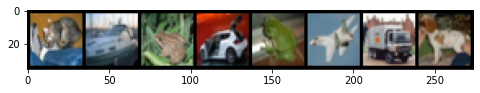

In [50]:
np.set_printoptions(formatter=dict(int=lambda x: f'{x:5}')) # to widen the printed array

nextrow = next(row)
lbls = y_test.index_select(0,torch.tensor(nextrow)).numpy()
gues = predicted.index_select(0,torch.tensor(nextrow)).numpy()
print("Index:", nextrow)
print("Label:", lbls)
print("Class: ", *np.array([class_names[i] for i in lbls]))
print()
print("Guess:", gues)
print("Class: ", *np.array([class_names[i] for i in gues]))

images = X_test.index_select(0,torch.tensor(nextrow))
im = make_grid(images, nrow=r)
plt.figure(figsize=(8,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

### **Saved the model**

In [52]:
torch.save(model.state_dict(), 'CIFAR10-CNN-Model.pt')

In [54]:
ls

CIFAR10-CNN-Model.pt  Data/  sample_data/


In [58]:
!pwd

/content


### **Load a Saved Model**

In [59]:
# Instantiate the model and load saved parameters
model2 = ConvolutionalNetwork()
model2.load_state_dict(torch.load('CIFAR10-CNN-Model.pt'))
model2.eval()

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [60]:
# Evaluate the saved model against the test set
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model2(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
        
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 6124/10000 =  61.240%


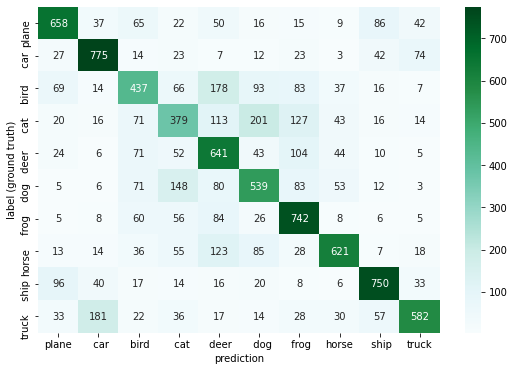

In [61]:
# Display the confusion matrix as a heatmap
arr = confusion_matrix(y_test.view(-1), predicted.view(-1))
df_cm = pd.DataFrame(arr, class_names, class_names)
plt.figure(figsize = (9,6))
sn.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")
plt.show();

## **CNN with REAL IMAGE**